In [1]:
from pathlib import Path
from qa2nli.qa_readers import race 
import tqdm
from typing import *
from joblib import delayed, Parallel
import json
import random
import math
import pandas as pd

In [2]:
number_of_examples_to_keep = 100
input_path = Path('.data/RACE/set1/nli_train.json')
label_field = 'label'
premise_field = 'premise'
hypothesis_field = 'hypothesis'

In [3]:
with open(input_path) as f:
    samples = json.load(f)
print(f"Input samples {len(samples)}")

Input samples 179560


In [4]:
pos_samples = [s for s in samples if s[label_field]==1]

In [5]:
neg_samples = [s for s in samples if s[label_field]==0]

In [6]:
print(f"Positive samples: {len(pos_samples)}\nNegative samples:{len(neg_samples)}\nRatio: {len(pos_samples)/len(neg_samples)}\nTotal: {len(pos_samples)+len(neg_samples)}")

Positive samples: 44890
Negative samples:134670
Ratio: 0.3333333333333333
Total: 179560


In [7]:
def get_length(s: str):
    tokens = s.split()
    return len(tokens)
# lengths
for ex in samples:
    ex[premise_field + '_length'] = get_length(ex[premise_field])
    ex[hypothesis_field + '_length'] = get_length(ex[hypothesis_field])

In [8]:
df_samples = pd.DataFrame(samples)

In [9]:
df_samples.describe()

,premise_length,hypothesis_length
count,179560.000000,179560.000000
mean,282.702963,13.950891
std,97.016034,4.774177
min,2.000000,2.000000
25%,228.000000,11.000000
50%,285.000000,14.000000
75%,330.000000,17.000000
max,1162.000000,50.000000


In [10]:
df_samples.quantile(0.9)

label                   1.0
valid_question          1.0
valid_option            1.0
conversion_success      1.0
exception               0.0
premise_length        378.0
hypothesis_length      20.0
Name: 0.9, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1055ba940>,
      dtype=object)

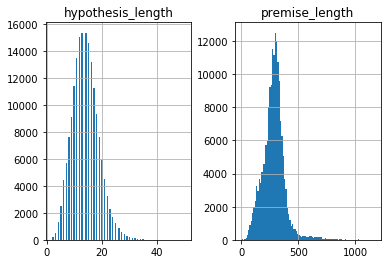

In [11]:
df_samples.hist(bins=100,column=['premise_length', 'hypothesis_length'])

In [12]:
# How many hypothesis have "following" in them? 
has_following = [s for s in samples if 'following' in s[hypothesis_field].lower()]
question_has_following = [s for s in samples if 'following' in s[hypothesis_field].lower()]
print(f"Hypothesis has 'following': {len(has_following)}") 
print(f"question has 'following': {len(question_has_following)}")        
print(len(has_following)/4)

Hypothesis has 'following': 36743
question has 'following': 36743
9185.75


In [13]:
print(f"Fraction of samples having 'following' {len(has_following)/(len(pos_samples)+len(neg_samples))}")

Fraction of samples having 'following' 0.20462797950545777


In [14]:
has_following[10]

{'id': 'high23054.txt_2_C',
 'premise': 'Have you ever had a troubling problem that has left you wondering where to turn for help?\n         Eve Hobsbawm is a life adviser.She offers advice to people struggling with all kinds of problems, from relationship difficulties to what to cook for dinner.\n         She does this through a website inviting people to email her with their problems.There \' s nothing unusual about that, except for the fact that Eve is only eight years old.\nThis junior trouble-shooter, who also goes by the name \'Miss Evie Mouse\' , lives in London with her parents.Not only is Miss Mouse willing to lend an ear to her clients, she will also offer them a helping hand, for a fee of course.She charges between 10p for advice on little, everyday worries and PS for more complicated problems.Her areas of expert knowledge, if not of experience, are problems about love, life and work-life balance.\n         A problem shared is a problem halved, but Eve can\' t always help.A 

In [15]:
with open('train_has_following.json', 'w') as f:
    json.dump(has_following,f)

In [16]:
# How many hypothesis have "_" in them? 
has_blank = [s for s in samples if '_' in s[hypothesis_field].lower()]
question_has_blank = [s for s in samples if '_' in s[hypothesis_field].lower()]
print(f"Hypothesis has '_': {len(has_blank)}") 
print(f"question has '_': {len(question_has_blank)}")        

Hypothesis has '_': 17530
question has '_': 17530


In [17]:
print(f"Fraction of samples having '_' {len(has_blank)/(len(pos_samples)+len(neg_samples))}")

Fraction of samples having '_' 0.09762753397193139


In [18]:
following_ids = set([s['id'] for s in has_following])
blank_ids = set([s['id'] for s in has_blank])
common_ids = following_ids.intersection(blank_ids)
print(f"Common: {len(common_ids)}")

Common: 596
